In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras

# Load the saved CNN model
model = keras.models.load_model('CNN_model.h5')

generated_seq = pd.read_csv('Generated promoters & Candidates.csv')
pcc6803_seq = pd.read_csv('PCC6803 Promoter and reads 100bp.csv')
pcc6803_seq

Promoter  Reads
0     CACCTCCAAATTATCTAAGTTAGCCAAATACCAAGAAGATTGGGCA...    106
1     TTTTGGGGAAACCGGCCGGGTCAGATTTAATCAGCGGCAACATCAC...    643
2     CCAAACGATGCTGAAGTTTACCGTTGCTGGTGAGCAGCAATAGTCC...    372
3     CAGCAACTCTTAACGGGAAATCCCAATGGTCCCTGGCAGAAAAAAT...    834
4     CCTGAATATCTCCAGGGTTATACCGCCCCCGATGAAGCTTTTGTTT...   1496
...                                                 ...    ...
3707  GAACCAAGTCGATTTGGGTTTATGAAAGCCAGAGGACAGGGCGGGG...   3711
3708  ACAACGTTGATCTACGGGCCGTTTATCGCAAGCTTGGCGATCGTCG...   4417
3709  TGCTTAGTTGAATTAGCTATAAACTAAATCAGTCAATTAGTCAGCT...     46
3710  GGGGGCAAACAGGGAGGTAGTGGAGATCATCGGCTGGCCAAACTTG...   6568
3711  GGCATCAGCGCAAAAGTAGAACAAAGTTCAGTCAAGGGCGGCGATC...    730

[3712 rows x 2 columns]

In [2]:
# 2.

import numpy as np

def one_hot_encoding_test(df, seq_column):
    bases = ['A', 'C', 'G', 'T']
    base_dict = dict(zip(bases, range(4)))
    n = len(df)
    total_width = df[seq_column].str.len().max() + 20
    X = np.zeros((n, 1, 4, total_width))
    seqs = df[seq_column].values
    for i in range(n):
        seq = seqs[i]
        for b in range(len(seq)):
            X[i, 0, base_dict[seq[b]], b + 10 + 100 - len(seq)] = 1    
    return X, total_width

# Usage:
X_test_encoded, total_width = one_hot_encoding_test(pcc6803_seq, 'Promoter')
total_width

120

In [3]:
# Predict the output (mRNA expression level)
predicted_output = model.predict(X_test_encoded)

# Example of how to use the predicted output
# Assuming you want to print the first 10 predictions
print("Predicted mRNA expression levels:")
for i in range(10):
    print(predicted_output[i])


Predicted mRNA expression levels:
[7.5914264]
[8.638052]
[8.468082]
[11.736656]
[11.01922]
[9.473843]
[11.732722]
[14.963807]
[10.988917]
[11.116663]


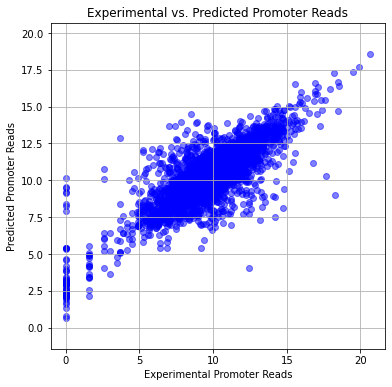

In [4]:
import matplotlib.pyplot as plt

# Assuming y_test contains the experimental promoter reads
# Replace this with your actual experimental promoter reads
y_test = np.log2(pcc6803_seq['Reads']+1)
# Plot the scatter plot
plt.figure(figsize=(6, 6))
plt.scatter(y_test, predicted_output, color='blue', alpha=0.5)
plt.title('Experimental vs. Predicted Promoter Reads')
plt.xlabel('Experimental Promoter Reads')
plt.ylabel('Predicted Promoter Reads')
plt.axis('equal')
plt.grid(True)
plt.show()


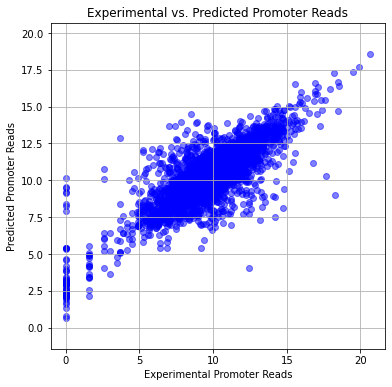

In [5]:
import matplotlib.pyplot as plt

# Assuming y_test contains the experimental promoter reads
# Replace this with your actual experimental promoter reads

# Plot the scatter plot
plt.figure(figsize=(6, 6))
plt.scatter(y_test, predicted_output, color='blue', alpha=0.5)
plt.title('Experimental vs. Predicted Promoter Reads')
plt.xlabel('Experimental Promoter Reads')
plt.ylabel('Predicted Promoter Reads')
plt.axis('equal')
plt.grid(True)
plt.show()


In [6]:
y_test = y_test.to_numpy()
predicted_output = predicted_output.flatten()

ERROR! Session/line number was not unique in database. History logging moved to new session 2


In [8]:
print("y_test", y_test)
print("predicted_output", predicted_output)

y_test [ 6.74146699  9.33091688  8.54303182 ...  5.55458885 12.68145805
  9.5137276 ]
predicted_output [7.5914264 8.638052  8.468082  ... 8.367143  8.799915  7.0201483]


In [7]:
# Calculate Pearson correlation coefficient
pearson_correlation = np.corrcoef(y_test, predicted_output)[0, 1]

print("Pearson Correlation Coefficient:", pearson_correlation)

Pearson Correlation Coefficient: 0.8103787674805427


In [9]:
from scipy.stats import pearsonr
pearson_corr, p_value = pearsonr(y_test, predicted_output)

print("Pearson Correlation Coefficient:", pearson_corr)
print("P-value:", p_value)

Pearson Correlation Coefficient: 0.8103787674805425
P-value: 0.0
